# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [52]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the training set

In [53]:
dataset = pd.read_csv('/content/AAPL.csv')
dataset_train = dataset.head(900)
dataset_test = dataset.tail(len(dataset)-900)

In [54]:
dataset_test.iloc[4, 7]

53117065

In [55]:
dataset.shape, dataset_train.shape, dataset_test.shape

((1258, 15), (900, 15), (358, 15))

In [56]:
dataset_train.reset_index(inplace=True)
dataset_test.reset_index(inplace=True)

In [29]:
dataset_train.to_csv('train.csv')
dataset_test.to_csv('test.csv')

In [33]:
training_set = df_train.iloc[:, 7:8].values
training_set.shape

(900, 1)

### Feature Scaling

In [34]:
#For RNN MinMaxScaler(Normalization) is recommended.

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [35]:
training_set_scaled.shape

(900, 1)

### Creating a data structure with 60 timesteps and 1 output

In [36]:
#RNN will predict the new value according to the value of previous 60 days.

X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [37]:
print(X_train[0], y_train[0])

[0.28654638 0.29734337 0.29286831 0.29265521 0.28313681 0.28881943
 0.28114789 0.28057963 0.27631766 0.26069044 0.26935644 0.27830658
 0.27123881 0.25642847 0.26303452 0.26793579 0.26445518 0.26786475
 0.26630203 0.266231   0.26431311 0.27603353 0.26758062 0.25188237
 0.25266373 0.2621111  0.25877255 0.24818866 0.25493678 0.24492115
 0.24044609 0.22687882 0.24882796 0.25600227 0.25372922 0.26807785
 0.27759625 0.29102145 0.30437562 0.22723398 0.2571388  0.25088791
 0.23504759 0.23710754 0.23547379 0.22957807 0.23156698 0.22375337
 0.19477198 0.16302032 0.18447223 0.17459866 0.18845006 0.19754226
 0.16003694 0.18496946 0.17275181 0.18496946 0.18773974 0.18539565] 0.17104702372496083


In [39]:
X_train.shape, y_train.shape

((840, 60), (840,))

### Reshaping

In [40]:
#Our new shape should match the input shape of LSTM layer.
#According to keras docs the input_shape should be (batch_size(no of observation), no of timestampts, no of features(in our case open is only feature))
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [42]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [43]:
#units=no of cells in LSTM layer(Neurons)
#Return_sequence should be true until we get reached to the lasst LSTM LAYER. DEFAULT IS FALSE
#input_Shape should be same as input X_train. The no of observation will be taken into account automatically.
#Dropout is to avoid overfitting. 0.2 means 20% of total neurons will be dropped(set to zero).
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [44]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [45]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [46]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [47]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [48]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [49]:
history = regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
27/27 [==============================] - 13s 59ms/step - loss: 0.0581
Epoch 2/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0086
Epoch 3/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0057
Epoch 4/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0053
Epoch 5/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0057
Epoch 6/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0055
Epoch 7/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0045
Epoch 8/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0044
Epoch 9/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0040
Epoch 10/100
27/27 [==============================] - 2s 60ms/step - loss: 0.0039
Epoch 11/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0039
Epoch 12/100
27/27 [==============================] - 2s 59ms/step - loss: 0.0039
Epoch 13/100
27/27 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [57]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 7:8].values

In [58]:
dataset_test.head(1)

,Unnamed: 0,index,Unnamed: 0.1,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,900,900,AAPL,2018-12-20 00:00:00+00:00,156.83,162.11,155.3,160.4,64772960,153.724073,158.899505,152.224373,157.223371,64772960,0.0,1.0


In [60]:
dataset_test.shape

(358, 17)

In [59]:
dataset_train.head(1)

,index,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.26,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.11136,45833246,0.0,1.0


### Getting the predicted stock price of 2017

In [64]:
dataset_total = pd.concat((dataset_train['open'], dataset_test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 358+60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

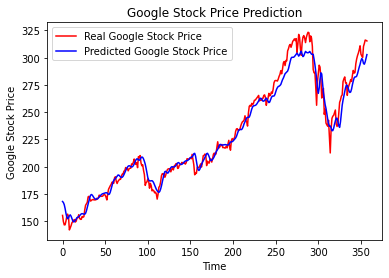

In [65]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()